# –ó–∞–¥–∞–Ω–∏–µ: –ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ —Å —Å–∞–π—Ç–∞ banki.ru
–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–∫–æ—Ç–æ—Ä—É—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5

In [1]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [3]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:57, 3518.36it/s]


## 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–∞

### 1.1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏

–†–∞–∑–±–∏—Ä–∞–µ–º—Å—è –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –¥–∞–Ω–Ω–Ω—ã—Ö:

In [6]:
responses[0]

{'city': '–≥. –ú–æ—Å–∫–≤–∞',
 'rating_not_checked': False,
 'title': '–ñ–∞–ª–æ–±–∞',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562',
 'author': 'uhnov1',
 'bank_name': '–ë–∏–Ω–±–∞–Ω–∫',
 'datetime': '2015-06-08 12:50:54',
 'text': '–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω

In [7]:
responses[0].get('city')

'–≥. –ú–æ—Å–∫–≤–∞'

In [8]:
len(responses) #–≤—Å–µ–≥–æ –æ—Ç–∑—ã–≤–æ–≤

153499

In [13]:
cities = [] #–≤ –æ–¥–∏–Ω –±–ª–æ–∫ –Ω–µ –ø–æ–ª—É—á–∞–ª–æ—Å—å –ø—Ä–æ–≥–Ω–∞—Ç—å, –Ω–∞ –ø–∞–º—è—Ç—å —Ä—É–≥–∞–ª—Å—è
for i in responses[0:100000]:
    cities.append(i.get('city'))

In [15]:
for i in responses[100000:153499]:
    cities.append(i.get('city'))
print(len(cities))

153499


In [17]:
cities[0:10]

['–≥. –ú–æ—Å–∫–≤–∞',
 '–≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫',
 '–≥. –ú–æ—Å–∫–≤–∞',
 '–≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å',
 '–≥. –ß–µ–ª—è–±–∏–Ω—Å–∫',
 '–≥. –ú–æ—Å–∫–≤–∞',
 '–≥. –í–æ–ª–≥–æ–≥—Ä–∞–¥',
 '–≥. –ú–æ—Å–∫–≤–∞',
 '–≥. –ü–µ—Ä–º—å',
 '–≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É']

In [19]:
num_cities = {}
count = 1
for i in cities:
    if num_cities.get(i, False) is False:
        count = 1
        num_cities[i] = count # –¥–æ–±–∞–≤–ª—è–µ–º –µ–≥–æ –∏ –ø–æ–º–µ—â–∞–µ—Ç —Ç—É–¥–∞ —Å–ø–∏—Å–æ–∫ —Å –æ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
    else:  # –µ—Å–ª–∏ —Ç–∞–∫–æ–π –∫–ª—é—á —É–∂–µ –µ—Å—Ç—å
        count = num_cities.get(i) 
        count = count+1
        num_cities[i] = count  # –¥–æ–±–∞–≤–ª—è–µ–º —Å—á–µ—Ç—á–∏–∫
#print(num_cities)

In [21]:
num_cities.get('–≥. –ú–æ—Å–∫–≤–∞')

55354

In [25]:
sorted_cities = sorted(num_cities.items(), reverse=True, key=lambda item: item[1])
sorted_cities[0:20]

[('–≥. –ú–æ—Å–∫–≤–∞', 55354),
 (None, 15174),
 ('–≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥', 14342),
 ('–≥. –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥', 2337),
 ('–≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫', 2300),
 ('–≥. –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥', 1976),
 ('–≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É', 1891),
 ('–≥. –°–∞–º–∞—Ä–∞', 1731),
 ('–≥. –ß–µ–ª—è–±–∏–Ω—Å–∫', 1507),
 ('–≥. –ö–∞–∑–∞–Ω—å', 1440),
 ('–≥. –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä', 1262),
 ('–≥. –£—Ñ–∞', 1246),
 ('–≥. –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫', 1236),
 ('–≥. –º–æ—Å–∫–≤–∞', 1217),
 ('–≥. –í–æ—Ä–æ–Ω–µ–∂', 1210),
 ('–≥. –ü–µ—Ä–º—å', 1163),
 ('–≥. –í–æ–ª–≥–æ–≥—Ä–∞–¥', 1014),
 ('–≥. –û–º—Å–∫', 989),
 ('–≥. –°–∞—Ä–∞—Ç–æ–≤', 933),
 ('–≥. –ò—Ä–∫—É—Ç—Å–∫', 749)]

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ—Ç–∑—ã–≤–æ–≤ –∏–∑ –ú–æ—Å–∫–≤—ã (55354), –±–µ–∑ –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥–∞ (15174), –∏ –∏–∑ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞. 

–ú–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –µ—â—ë –ø—Ä–∏–≤–µ—Å—Ç–∏ –≤—Å—ë –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É –∏ –ø–æ—Å—á–∏—Ç–∞—Ç—å —Ç–∞–∫, –∏–ª–∏ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –≤—Ö–æ–∂–¥–µ–Ω–∏–µ –ú–æ—Å–∫–≤–∞ –≤ —Å—Ç—Ä–æ–∫—É.

–¢–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –±–∞–Ω–∫–æ–≤:

In [27]:
banks = [] #–≤ –æ–¥–∏–Ω –±–ª–æ–∫ –Ω–µ –ø–æ–ª—É—á–∞–ª–æ—Å—å –ø—Ä–æ–≥–Ω–∞—Ç—å, –Ω–∞ –ø–∞–º—è—Ç—å —Ä—É–≥–∞–ª—Å—è
for i in responses:
    banks.append(i.get('bank_name'))

In [29]:
num_banks = {}
count = 1
for i in banks:
    if num_banks.get(i, False) is False:
        count = 1
        num_banks[i] = count # –¥–æ–±–∞–≤–ª—è–µ–º –µ–≥–æ –∏ –ø–æ–º–µ—â–∞–µ—Ç —Ç—É–¥–∞ —Å–ø–∏—Å–æ–∫ —Å –æ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
    else:  # –µ—Å–ª–∏ —Ç–∞–∫–æ–π –∫–ª—é—á —É–∂–µ –µ—Å—Ç—å
        count = num_banks.get(i) 
        count = count+1
        num_banks[i] = count  # –¥–æ–±–∞–≤–ª—è–µ–º —Å—á–µ—Ç—á–∏–∫
#print(num_cities)

In [33]:
sorted_banks = sorted(num_banks.items(), reverse=True, key=lambda item: item[1])
sorted_banks[0:20]

[('–°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏', 26327),
 ('–ê–ª—å—Ñ–∞-–ë–∞–Ω–∫', 10224),
 ('–í–¢–ë 24', 8185),
 ('–†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç', 7943),
 ('–•–æ—É–º –ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫', 7549),
 ('–¢–∏–Ω—å–∫–æ—Ñ—Ñ –ë–∞–Ω–∫', 5387),
 ('–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª', 4607),
 ('–†–µ–Ω–µ—Å—Å–∞–Ω—Å –ö—Ä–µ–¥–∏—Ç', 3849),
 ('–°–≤—è–∑–Ω–æ–π –ë–∞–Ω–∫', 3775),
 ('–û–¢–ü –ë–∞–Ω–∫', 3237),
 ('–í–æ—Å—Ç–æ—á–Ω—ã–π –≠–∫—Å–ø—Ä–µ—Å—Å –ë–∞–Ω–∫', 3138),
 ('–†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫', 3057),
 ('–ú–æ—Å–∫–æ–≤—Å–∫–∏–π –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –ë–∞–Ω–∫', 2944),
 ('–°–∏—Ç–∏–±–∞–Ω–∫', 2848),
 ('–ê–≤–∞–Ω–≥–∞—Ä–¥', 2733),
 ('–ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫', 2586),
 ('–Æ–Ω–∏–ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫', 2488),
 ('–ë–∞–Ω–∫ –ú–æ—Å–∫–≤—ã', 2456),
 ('–•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –±–∞–Ω–∫ –û—Ç–∫—Ä—ã—Ç–∏–µ', 2158),
 ('–ú–¢–° –ë–∞–Ω–∫', 1870)]

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ—Ç–∑—ã–≤–æ–≤ –Ω–∞ –°–±–µ—Ä–±–∞–Ω–∫ (26327) –∏ –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫ (10224). –í–∏–¥–∏–º–æ –±–∞–Ω–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤—ã–±–∏—Ä–∞—é—Ç –∏–∑ —Å–ø–∏—Å–∫–∞, —Ç–∞–∫ –∫–∞–∫ –Ω–µ—Ç –æ–ø–µ—á–∞—Ç–æ–∫ –∏ —Ä–∞–∑–Ω—ã—Ö –Ω–∞–ø–∏—Å–∞–Ω–∏–π –æ–¥–Ω–æ–≥–æ –∏ —Ç–æ–≥–æ –∂–µ –±–∞–Ω–∫–∞.

### 1.2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö

##### –ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ö.

–°–Ω–∞—á–∞–ª–∞ –¥–ª—è –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:

In [7]:
responses[0].get('text') 

'–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞, –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤: –¥–æ–≥–æ–≤–æ—Ä ‚Ññ 81014 –æ—Ç 20.10.2013 –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤

In [9]:
lst = responses[0].get('text').replace('.', '').split() #—Ä–∞–∑–¥–µ–ª–∏–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞ –ø–æ –ø—Ä–æ–±–µ–ª–∞–º

In [10]:
count_words = [] #–∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ –∑–∞–º–µ–Ω—è–µ–º –µ–≥–æ –¥–ª–∏–Ω–æ–π
for i in lst:
    count_words.append(len(i))

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª–∏–Ω —Å–ª–æ–≤ –¥–ª—è –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:

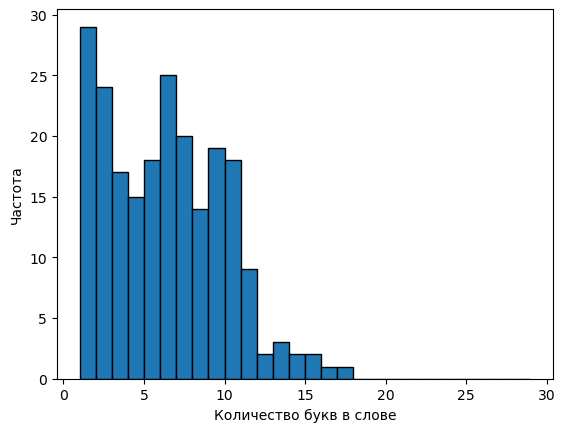

In [10]:
import matplotlib.pyplot as plt

# –î–∞–Ω–Ω—ã–µ
data = count_words

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
plt.hist(data, bins=range(1, 30), edgecolor='black')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É–∫–≤ –≤ —Å–ª–æ–≤–µ')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª–∏–Ω —Å–ª–æ–≤ –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤:

In [11]:
texts = [] #—Å–ª–µ–ø–ª–∏–≤–∞–µ–º –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫ –≤—Å–µ —Ç–µ–∫—Å—Ç—ã
for i in responses:
    texts.append(i.get('text'))
len(texts)

153499

In [15]:
texts[0]

'–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞, –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤: –¥–æ–≥–æ–≤–æ—Ä ‚Ññ 81014 –æ—Ç 20.10.2013 –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤

In [12]:
import re
clean_texts_test = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', texts[0])
clean_texts_test

'–î–æ–±—Ä—ã–π –¥–µ–Ω—å –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞  –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û –ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞ –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º  –∫–≤–∞—Ä—Ç–∏—Ä–∞  —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –°–æ –≤—Å–µ–π –æ—Ç–≤

In [13]:
giga_text = ' '.join(texts) #—Å–ª–µ–ø–ª–∏–≤–∞–µ–º –≤ –æ–¥–∏–Ω –≥–∏–≥–∞ —Ç–µ–∫—Å—Ç –≤—Å–µ —ç–ª–µ–º–µ–Ω—Ç—ã —Å–ø–∏—Å–∫–∞

In [55]:
len(giga_text) #–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ

238723607

In [57]:
import re #–ø–æ—á–∏—Å—Ç–∏–º —Ç–µ–∫—Å—Ç, –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –≤—Å–µ–≥–æ –∫—Ä–æ–º–µ –±—É–∫–≤
clean_texts = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', giga_text)

In [161]:
len(clean_texts)

225648783

In [163]:
lst = clean_texts.replace('.', '').split() #—Ä–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ø–∏—Å–æ–∫ –ø–æ –ø—Ä–æ–±–µ–ª–∞–º

In [165]:
len(lst)

35020379

In [167]:
count_words = [] #–∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ –∑–∞–º–µ–Ω—è–µ–º –µ–≥–æ –¥–ª–∏–Ω–æ–π
for i in lst:
    count_words.append(len(i))

In [169]:
len(count_words)

35020379

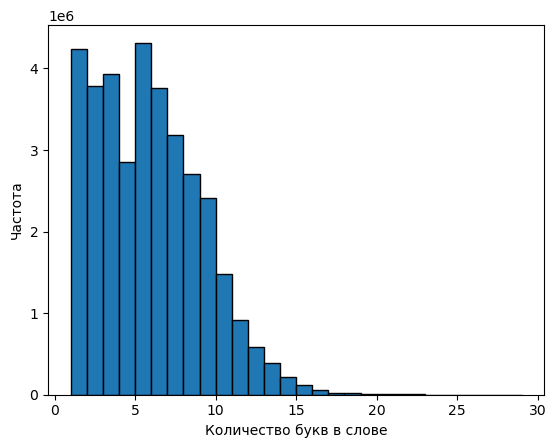

In [171]:
import matplotlib.pyplot as plt

# –î–∞–Ω–Ω—ã–µ
data = count_words

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
plt.hist(data, bins=range(1, 30), edgecolor='black')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É–∫–≤ –≤ —Å–ª–æ–≤–µ')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

##### –í—Ç–æ—Ä—É—é –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ—Å—Ç—Ä–æ—é –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–ª–æ–≤ –≤ –æ–¥–Ω–æ–º –æ—Ç–∑—ã–≤–µ:

In [ ]:
#–ø—Ä–æ—Ö–æ–¥–∏–º—Å—è —Ü–∏–∫–ª–æ–º –ø–æ –≤—Å–µ–º –æ—Ç–∑—ã–≤–∞–º, –∫–∞–∂–¥—ã–π –æ—Ç–∑—ã–≤ –¥–µ–ª–∏–º –Ω–∞ —Å–ª–æ–≤–∞, –∑–∞—Ç–µ–º –≤–º–µ—Å—Ç–æ –æ—Ç–∑—ã–≤–∞ —Ü–µ–ª–∏–∫–æ–º –∑–∞–ø–∏—Å—ã–≤–∞–µ–º —á–∏—Å–ª–æ —Å–ª–æ–≤ –≤ —Å–ø–∏—Å–æ–∫

In [94]:
texts = [] #—Å–ª–µ–ø–ª–∏–≤–∞–µ–º –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫ –≤—Å–µ —Ç–µ–∫—Å—Ç—ã
for i in responses:
    texts.append(i.get('text'))
len(texts)

153499

In [102]:
review_lenght = [] #–≤ texts —Å –ø—Ä–æ—à–ª–æ–π –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —É–∂–µ –ª–µ–∂–∞—Ç –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤ –∏–∑ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Å–ª–æ–≤–∞—Ä—è
for i in texts:
    review_lenght.append(len(i))

In [106]:
len(review_lenght)

153499

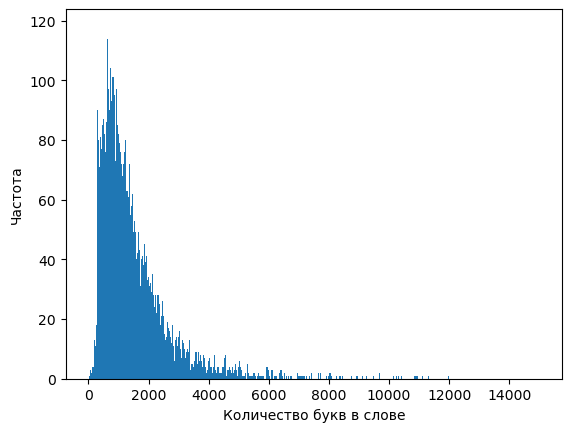

In [116]:
# –î–∞–Ω–Ω—ã–µ
data = review_lenght

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
plt.hist(data, bins=range(1, 15000))
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É–∫–≤ –≤ —Å–ª–æ–≤–µ')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

### 1.3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö: —Å–ª–æ–≤, —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤, –ª–µ–º–º, —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö

##### –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞

–î–ª—è –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:

In [11]:
clean_text = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', responses[0].get('text'))

In [12]:
lst = clean_text.replace('.', '').split() #—Ä–∞–∑–¥–µ–ª–∏–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞ –ø–æ –ø—Ä–æ–±–µ–ª–∞–º
lst[0:5]

['–î–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '–Ø', '–Ω–µ', '—è–≤–ª—è—é—Å—å']

In [13]:
from collections import Counter

my_list = lst
most_common_element = Counter(my_list).most_common(10)#[0][0]

print(most_common_element)

[('–Ω–µ', 7), ('–∏', 7), ('–≤', 6), ('–ø–æ', 5), ('—Å', 5), ('–º–Ω–µ', 4), ('–≥–æ–¥–∞', 3), ('–æ—Ç', 3), ('–¥–æ–≥–æ–≤–æ—Ä', 3), ('–Ω–∞', 3)]


–î–ª—è –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤:

In [138]:
lst = giga_text.replace('.', '').split() #—Ä–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ø–∏—Å–æ–∫ –ø–æ –ø—Ä–æ–±–µ–ª–∞–º

In [143]:
my_list = lst
most_common_element = Counter(my_list).most_common(10)#[0][0]

print(most_common_element)

[('–≤', 1157361), ('–∏', 966959), ('–Ω–µ', 808432), ('–Ω–∞', 632628), ('—á—Ç–æ', 587842), ('—è', 430225), ('—Å', 423726), ('–ø–æ', 333356), ('-', 294105), ('–º–Ω–µ', 279398)]


##### –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤ (–∏ –±–µ–∑ –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, –∏ –≤—Å—ë –ø—Ä–∏–≤–µ–¥–µ–Ω–æ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É)

In [23]:
clean_texts = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', giga_text)

In [24]:
clean_texts = clean_texts.lower()

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = clean_texts
tokens = word_tokenize(text)
stop_words = set(stopwords.words('russian'))
filtered_tokens = [word for word in tokens if word not in stop_words]

In [34]:
filtered_tokens[0:5]

['–¥–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '—è–≤–ª—è—é—Å—å', '–∫–ª–∏–µ–Ω—Ç–æ–º', '–±–∞–Ω–∫–∞']

In [42]:
from collections import Counter
my_list = filtered_tokens
most_common_element = Counter(my_list).most_common#[0][0]

print(most_common_element(10))

[('–±–∞–Ω–∫–∞', 263827), ('–±–∞–Ω–∫', 196235), ('—ç—Ç–æ', 183007), ('–¥–µ–Ω—å–≥–∏', 130040), ('–∫–∞—Ä—Ç—É', 104929), ('–∫–∞—Ä—Ç—ã', 100872), ('–∫—Ä–µ–¥–∏—Ç', 80212), ('–¥–µ–Ω—å', 75984), ('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 69499), ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 66450)]


##### –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –ø–æ—Å–ª–µ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏

In [44]:
from pymorphy3 import MorphAnalyzer

In [134]:
morph = MorphAnalyzer()

In [136]:
lemmas = [] #–ø–æ–ª—É—á–∞—é –ª–µ–º–º—ã –≤—Å–µ–≥–æ —Ç–µ–∫—Å—Ç–∞
for token in filtered_tokens:
    lemmas.append(morph.normal_forms(token)[0])

In [137]:
my_list = lemmas
most_common_element = Counter(my_list).most_common#[0][0]

print(most_common_element(10))

[('–±–∞–Ω–∫', 624062), ('–∫–∞—Ä—Ç–∞', 331778), ('—ç—Ç–æ', 199689), ('–¥–µ–Ω—å–≥–∞', 178322), ('–¥–µ–Ω—å', 172195), ('–º–æ–π', 161053), ('–∫—Ä–µ–¥–∏—Ç', 154772), ('–∫–æ—Ç–æ—Ä—ã–π', 148785), ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 143574), ('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 133561)]


##### –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ:

–î–ª—è –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:

In [1144]:
from pymystem3 import Mystem #—Å—Ç–∞–≤–∏–º –±–∏–±–ª–∏–æ—Ç–∏–∫—É, —Ä–∞–∑–±–∏—Ä–∞–µ–º—Å—è –∫–∞–∫ –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç
mystem = Mystem()
text = '–ª–µ—Å'
speech_part = mystem.analyze(text)
print(speech_part)
print(speech_part[0])
print(speech_part[0].get('analysis'))
print(speech_part[0].get('analysis')[0].get('gr')[0])

[{'analysis': [{'lex': '–ª–µ—Å', 'wt': 0.9992945031, 'gr': 'S,–º—É–∂,–Ω–µ–æ–¥=(–≤–∏–Ω,–µ–¥|–∏–º,–µ–¥)'}], 'text': '–ª–µ—Å'}, {'text': '\n'}]
{'analysis': [{'lex': '–ª–µ—Å', 'wt': 0.9992945031, 'gr': 'S,–º—É–∂,–Ω–µ–æ–¥=(–≤–∏–Ω,–µ–¥|–∏–º,–µ–¥)'}], 'text': '–ª–µ—Å'}
[{'lex': '–ª–µ—Å', 'wt': 0.9992945031, 'gr': 'S,–º—É–∂,–Ω–µ–æ–¥=(–≤–∏–Ω,–µ–¥|–∏–º,–µ–¥)'}]
S


In [107]:
clean_texts = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', texts[0]) 

In [109]:
clean_texts = clean_texts.lower()

In [111]:
#–ø—Ä–∏–≤–æ–¥–∏–º –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = clean_texts
tokens = word_tokenize(text)
stop_words = set(stopwords.words('russian'))
filtered_tokens = [word for word in tokens if word not in stop_words]

In [113]:
filtered_tokens[0:5]

['–¥–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '—è–≤–ª—è—é—Å—å', '–∫–ª–∏–µ–Ω—Ç–æ–º', '–±–∞–Ω–∫–∞']

In [115]:
lemmas = [] #–ø–æ–ª—É—á–∞—é –ª–µ–º–º—ã –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞
for token in filtered_tokens:
    lemmas.append(morph.normal_forms(token)[0])

In [117]:
lemmas[0:5]

['–¥–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '—è–≤–ª—è—Ç—å—Å—è', '–∫–ª–∏–µ–Ω—Ç', '–±–∞–Ω–∫']

In [119]:
speech_part_test = []
for i in lemmas:
#    print(i)
#    print(mystem.analyze(i))
#    print(mystem.analyze(i)[0].get('analysis')[0].get('gr')[0])
    if mystem.analyze(i)[0].get('analysis')[0].get('gr')[0] == 'S':
        speech_part_test.append(i)

In [125]:
from collections import Counter
my_list = speech_part_test
most_common_element = Counter(my_list).most_common(10)#[0][0]

print('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ –≤ –ø–µ—Ä–≤–æ–º —Ç–µ–∫—Å—Ç–µ:', most_common_element)

–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ –≤ –ø–µ—Ä–≤–æ–º —Ç–µ–∫—Å—Ç–µ: [('–¥–æ–≥–æ–≤–æ—Ä', 4), ('–±–∞–Ω–∫', 3), ('–æ—Ç–Ω–æ—à–µ–Ω–∏–µ', 3), ('–≥–æ–¥', 3), ('–ø–∏—Å—å–º–æ', 3), ('–∞–¥—Ä–µ—Å', 3), ('—É–≥—Ä–æ–∑–∞', 2), ('–≥—Ä–∞–∂–¥–∞–Ω–∏–Ω', 2), ('–≤–æ–ø—Ä–æ—Å', 2), ('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 2)]


__________________
–î–ª—è 50 —Ç–µ–∫—Å—Ç–æ–≤:

In [1258]:
mystem = Mystem()

In [1260]:
responses_for_nouns = responses[0:500]

In [1262]:
print(responses[0])

{'city': '–≥. –ú–æ—Å–∫–≤–∞', 'rating_not_checked': False, 'title': '–ñ–∞–ª–æ–±–∞', 'num_comments': 0, 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562', 'author': 'uhnov1', 'bank_name': '–ë–∏–Ω–±–∞–Ω–∫', 'datetime': '2015-06-08 12:50:54', 'text': '–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω

In [1264]:
texts_for_nouns = []
for i in responses_for_nouns:
    texts_for_nouns.append(i.get('text'))
print(texts_for_nouns[0])

–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞, –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤: –¥–æ–≥–æ–≤–æ—Ä ‚Ññ 81014 –æ—Ç 20.10.2013 –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–

In [1266]:
clean_texts_for_nouns = []
for i in texts_for_nouns:
    clean_texts_for_nouns.append(re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', i))
print(clean_texts_for_nouns[0])

–î–æ–±—Ä—ã–π –¥–µ–Ω—å –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞  –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û –ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞ –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º  –∫–≤–∞—Ä—Ç–∏—Ä–∞  —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –°–æ –≤—Å–µ–π –æ—Ç–≤–

In [1268]:
clean_texts_for_nouns_lower = []
for i in clean_texts_for_nouns:
    clean_texts_for_nouns_lower.append(i.lower())
print(clean_texts_for_nouns_lower[0])

–¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏  –Ω–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞  –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –æ–æ–æ –ø—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –º–æ—Å–∫–≤–∞ —É–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º  –∫–≤–∞—Ä—Ç–∏—Ä–∞  —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ —Ñ–∏–ª–∏–ø–ø–æ–≤–∞ —ç–¥—É–∞—Ä–¥–∞ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ —Å–æ –≤—Å–µ–π –æ—Ç–≤–

In [1270]:
giga_text_for_nouns = ' '.join(clean_texts_for_nouns_lower)

In [1272]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = giga_text_for_nouns #—á–∏—Å—Ç–∏–º –æ—Ç —Å—Ç–æ–ø-—Å–ª–æ–≤
tokens = word_tokenize(text)
stop_words = set(stopwords.words('russian'))
filtered_tokens = [word for word in tokens if word not in stop_words]

In [1274]:
filtered_tokens[0:5]

['–¥–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '—è–≤–ª—è—é—Å—å', '–∫–ª–∏–µ–Ω—Ç–æ–º', '–±–∞–Ω–∫–∞']

In [1276]:
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

lemmas = [] #–ø–æ–ª—É—á–∞—é –ª–µ–º–º—ã –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞
for token in filtered_tokens:
    lemmas.append(morph.normal_forms(token)[0])

In [1278]:
print(lemmas[0:5])
len(lemmas)

['–¥–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '—è–≤–ª—è—Ç—å—Å—è', '–∫–ª–∏–µ–Ω—Ç', '–±–∞–Ω–∫']


58040

In [ ]:
speech_part_test = []
for i in lemmas:
    try:
        if mystem.analyze(i)[0].get('analysis')[0].get('gr')[0] == 'S':
            speech_part_test.append(i)
    except IndexError:
        pass

In [1194]:
speech_part_test = [] #–æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ, –∑–¥–µ—Å—å –≤—ã–ª–µ—Ç–∞–µ—Ç –æ—à–∏–±–∫–∞ –µ—Å–ª–∏ –Ω–µ –ø–µ—Ä–µ–∑–∞–ø—É—Å—Ç–∏—Ç—å —Ñ–∞–π–ª, –ø–ª—é—Å –∏–Ω–æ–≥–¥–∞ –æ–Ω –Ω–µ –Ω–∞—Ö–æ–¥–∏—Ç –≤–æ–æ–±—â–µ —á–∞—Å—Ç—å —Ä–µ—á–∏, –∏ —ç—Ç–æ —Ç–æ–∂–µ –æ—à–∏–±–∫–∞
try:
    for i in lemmas:
        if mystem.analyze(i)[0].get('analysis')[0].get('gr')[0] == 'S':
            speech_part_test.append(i)
except:
    pass

In [1252]:
my_list = speech_part_test
most_common_element = Counter(my_list).most_common(len(my_list))#[0][0] #–∑–¥–µ—Å—å –Ω–∞–¥–æ –¥–æ–∫—Ä—É—Ç–∏—Ç—å, –≤ most_common_element 
#–±—É–¥–µ—Ç —Ö—Ä–∞–Ω–∏—Ç—å—Å—è –≤–µ—Å—å —Å–ø–∏—Å–æ–∫ –≤—Å–µ–≥–æ, –≤ –ø—Ä–∏–Ω—Ç–µ –Ω–∞–¥–æ –≤—ã–≤–µ—Å—Ç–∏ 10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö

In [1254]:
print(most_common_element)

[('–±–∞–Ω–∫', 7), ('–∫–∞—Ä—Ç–∞', 7), ('—Ä—É–±', 5), ('–¥–æ–≥–æ–≤–æ—Ä', 4), ('–≥–æ–¥', 4), ('–¥–æ–∫—É–º–µ–Ω—Ç', 4), ('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 4), ('—Ñ–∞–º–∏–ª–∏—è', 4), ('–æ—Ç–Ω–æ—à–µ–Ω–∏–µ', 3), ('–ø–∏—Å—å–º–æ', 3), ('–∞–¥—Ä–µ—Å', 3), ('—Å–±–µ—Ä–±–∞–Ω–∫', 3), ('—Ç–æ–∫–∞—Ä–µ–≤', 3), ('—Å–µ–∫–ª–µ—Ç–∏–Ω–∞', 3), ('—Å–∏—Ç—É–∞—Ü–∏—è', 3), ('–¥–µ–Ω—å', 2), ('–∫–ª–∏–µ–Ω—Ç', 2), ('—É–≥—Ä–æ–∑–∞', 2), ('–≥—Ä–∞–∂–¥–∞–Ω–∏–Ω', 2), ('–≤–æ–ø—Ä–æ—Å', 2), ('–∫–æ–ø–∏—è', 2), ('–ø–∞—Å–ø–æ—Ä—Ç', 2), ('—Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ', 2), ('–±—Ä–∞–∫', 2), ('–º–∞—Ä–∏—è', 2), ('–∞–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤–∏—á', 2), ('–±–∞–∑–∞', 2), ('—É–≤–∞–∂–µ–Ω–∏–µ', 2), ('–∏–Ω—Ç–µ—Ä–Ω–µ—Ç–º–∞–≥–∞–∑–∏–Ω', 2), ('—Å—É–º–º–∞', 2), ('–ø–æ—Ä—É—á–∏—Ç–µ–ª—å', 1), ('–∫–∞–∫–∏–º–ª–∏–±–æ', 1), ('–ª–∏—Ü–æ', 1), ('–ø–æ–≤–æ–¥', 1), ('—É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏–µ', 1), ('—á—å–µ–π–ª–∏–±–æ', 1), ('–∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç—å', 1), ('–º–∞—Ä—Ç', 1), ('–æ–æ–æ', 1), ('–≥–æ—Ä–æ–¥', 1), ('–º–æ—Å–∫–≤–∞', 1), ('–ø–µ—Ä–µ—É–ª–æ–∫', 1), ('–¥–æ–º', 1), ('–∫–≤–∞—Ä—Ç

In [1256]:
print(most_common_element[0:10])

[('–±–∞–Ω–∫', 7), ('–∫–∞—Ä—Ç–∞', 7), ('—Ä—É–±', 5), ('–¥–æ–≥–æ–≤–æ—Ä', 4), ('–≥–æ–¥', 4), ('–¥–æ–∫—É–º–µ–Ω—Ç', 4), ('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 4), ('—Ñ–∞–º–∏–ª–∏—è', 4), ('–æ—Ç–Ω–æ—à–µ–Ω–∏–µ', 3), ('–ø–∏—Å—å–º–æ', 3)]


### 1.4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞

#### –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞
–ï—Å–ª–∏ –≤—Å–µ —Å–ª–æ–≤–∞ –∫–æ—Ä–ø—É—Å–∞ —Ç–µ–∫—Å—Ç–∞ —É–ø–æ—Ä—è–¥–æ—á–∏—Ç—å –ø–æ —É–±—ã–≤–∞–Ω–∏—é —á–∞—Å—Ç–æ—Ç—ã –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è, —Ç–æ —á–∞—Å—Ç–æ—Ç–∞ n-–Ω–æ–≥–æ —Å–ª–æ–≤–∞ –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–∞ –µ–≥–æ –ø–æ—Ä—è–¥–∫–æ–≤–æ–º—É –Ω–æ–º–µ—Ä—É

–î–ª—è –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:

In [99]:
most_common_element_one_text = Counter(my_list).most_common(len(my_list))
most_common_element_one_text[0:5]

[('–¥–æ–≥–æ–≤–æ—Ä', 4), ('–±–∞–Ω–∫', 3), ('–æ—Ç–Ω–æ—à–µ–Ω–∏–µ', 3), ('–≥–æ–¥', 3), ('–ø–∏—Å—å–º–æ', 3)]

In [105]:
counter_ = []
for i in most_common_element_one_text:
    counter_.append(i[1])
counter_[0:5]

[4, 3, 3, 3, 3]

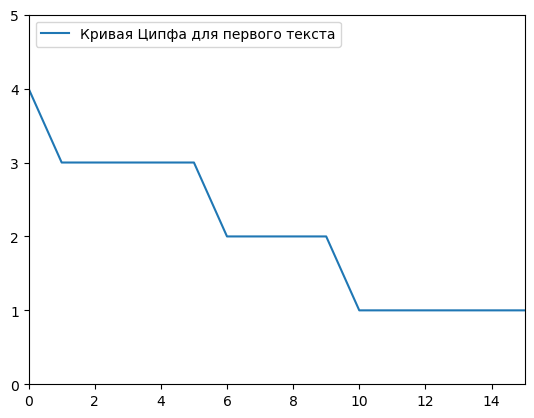

In [112]:
data = {'–ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞ –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Ç–µ–∫—Å—Ç–∞':counter_}
df = pd.DataFrame(data)
x = np.arange(len(counter_))
plt.axis([0,15,0,5])
plt.plot(x,df)
plt.legend(data, loc=2)
plt.show()

_________________
–î–ª—è 2000 —Ç–µ–∫—Å—Ç–æ–≤:

In [129]:
counter_ = []
for i in most_common_element(2000):
    counter_.append(i[1])
len(counter_)

2000

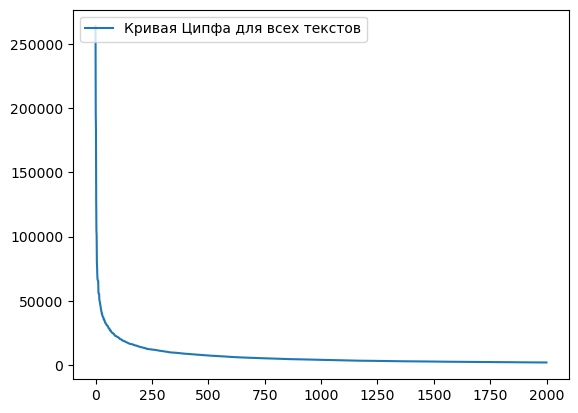

In [131]:
data = {'–ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞ –¥–ª—è –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤':counter_}
df = pd.DataFrame(data)
x = np.arange(len(counter_))
#plt.axis([0,100,0,100])
plt.plot(x,df)
plt.legend(data, loc=2)
plt.show()

________________

#### –ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞
–ß–µ–º –±–æ–ª—å—à–µ –∫–æ—Ä–ø—É—Å, —Ç–µ–º –º–µ–Ω—å—à–µ –Ω–æ–≤—ã—Ö —Å–ª–æ–≤ –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –Ω–æ–≤—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤. –í –∫–∞–∫–æ–π-—Ç–æ –º–æ–º–µ–Ω—Ç –∫–æ—Ä–ø—É—Å –Ω–∞—Å—ã—â–∞–µ—Ç—Å—è.

In [ ]:
#–≤ —Ü–∏–∫–ª–µ —Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–º–µ—Ä –ø–µ—Ä–≤–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ - –∫–æ–ª-–≤–æ –Ω–æ–≤—ã—Ö —Å–ª–æ–≤, —Ä–∞–∑–º–µ—Ä –ø–µ—Ä–≤–æ–≥–æ+–≤—Ç–æ—Ä–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ - –∫–æ–ª-–≤–æ –Ω–æ–≤—ã—Ö —Å–ª–æ–≤ –∏ —Ç.–¥
#–ø–æ–ª—É—á–∞–µ—Ç—Å—è –¥–≤–∞ —Å–ø–∏—Å–∫–∞, –≤ –æ–¥–Ω–æ–º –∑–∞–ø–∏—Å–∞–Ω–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤—Å–µ–≥–æ, –≤–æ –≤—Ç–æ—Ä–æ–º –∑–∞–ø–∏—Å–∞–Ω–æ –Ω–∞ —Å–∫–æ–ª—å–∫–æ —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å
#—É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤
#–≤ –º–∞—Ç–ø–ª–æ—Ç–ª–∏–± —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –æ–±–∞ —Å–ø–∏—Å–∫–∞ –ø–µ—Ä–µ–¥–∞—ë–º –∏ –≤—Å—ë

In [238]:
###–ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞###
responses_for_hipsa = responses[0:5000] #—è —É—Å—Ç–∞–ª–∞ –∂–¥–∞—Ç—å –∫–æ–≥–¥–∞ –ø–æ—Å—Ç—Ä–æ–∏—Ç—Å—è –¥–ª—è –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤ –∏ –≤–æ–∑—å–º—É –ø–µ—Ä–≤—ã–µ 5000

In [240]:
texts_for_hipsa = []
for i in responses_for_hipsa:
    texts_for_hipsa.append(i.get('text'))

In [242]:
clean_texts_for_hipsa = []
for i in texts_for_hipsa:
    clean_texts_for_hipsa.append(re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', i))

In [244]:
clean_texts_for_hipsa_lower = []
for i in clean_texts_for_hipsa:
    clean_texts_for_hipsa_lower.append(i.lower())

In [246]:
clean_texts_for_hipsa_lower[0]
###–∫–æ–Ω–µ—Ü –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏###

'–¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏  –Ω–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞  –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –æ–æ–æ –ø—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –º–æ—Å–∫–≤–∞ —É–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º  –∫–≤–∞—Ä—Ç–∏—Ä–∞  —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ —Ñ–∏–ª–∏–ø–ø–æ–≤–∞ —ç–¥—É–∞—Ä–¥–∞ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ —Å–æ –≤—Å–µ–π –æ—Ç–≤

In [248]:
#—Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ —Å–∫–æ–ª—å–∫–æ —Å–ª–æ–≤ –≤ —Ç–µ—Ö —Ç–µ–∫—Å—Ç–∞—Ö –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–¥–≥—Ä—É–∂–∞—é—Ç, –ø–µ—Ä–µ–¥–∞—ë—Ç—Å—è —Å–ø–∏—Å–æ–∫ —Å —Ç–µ–∫—Å—Ç–∞–º–∏, –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è —Å–ø–∏—Å–æ–∫
#—Å –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—é—â–∏–º—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å–ª–æ–≤
def count_of_all_texts_hips(text):

    size_of_texts = []
    size_of_all_texts = 0

    for i in text:
        lst = clean_texts_for_hipsa_lower[1].replace('.', '').split()
        size_of_local_text = len(lst)
        size_of_all_texts = size_of_all_texts+size_of_local_text
        size_of_texts.append(size_of_all_texts)
        
    return size_of_texts

In [250]:
#—Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤, –¥–æ–±–∞–≤–ª—è—é—â–∏—Ö—Å—è —Å –∫–∞–∂–¥—ã–º –Ω–æ–≤—ã–º —Ç–µ–∫—Å—Ç–æ–º
def unique_words_hips(text):
    unique_words = []
    unique_words_count = []
    for i in text:
        lst = i.replace('.', '').split()
        for i in lst:
            if i not in unique_words:
                unique_words.append(i)  
        unique_words_count_local_text = len(unique_words)
        unique_words_count.append(unique_words_count_local_text)
            
    return unique_words_count

–ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞ –¥–ª—è 5000 —Ç–µ–∫—Å—Ç–æ–≤:

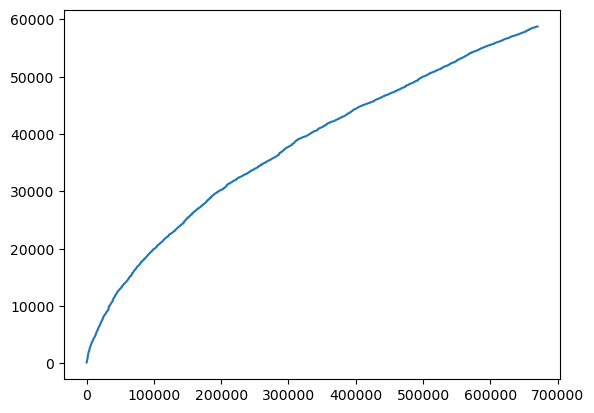

In [252]:
x = count_of_all_texts_hips(clean_texts_for_hipsa_lower)
y = unique_words_hips(clean_texts_for_hipsa_lower)
plt.plot(x, y)
plt.show()

## 1.5 –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã: –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç", —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?

In [142]:
item = '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫' 
for i in most_common_element(3000):
    try:
        index = i.index(item)
        print(f"—Å–ª–æ–≤–æ {item} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {i[1]} —Ä–∞–∑")
    except ValueError:
        pass

—Å–ª–æ–≤–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 133561 —Ä–∞–∑


In [144]:
item = '–∫–ª–∏–µ–Ω—Ç'
for i in most_common_element(3000):
    try:
        index = i.index(item)
        print(f"—Å–ª–æ–≤–æ {item} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {i[1]} —Ä–∞–∑")
    except ValueError:
        pass

—Å–ª–æ–≤–æ –∫–ª–∏–µ–Ω—Ç –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 132891 —Ä–∞–∑


–°–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ.

In [147]:
item = '–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ' 
for i in most_common_element(3000):
    try:
        index = i.index(item)
        print(f"—Å–ª–æ–≤–æ {item} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {i[1]} —Ä–∞–∑")
    except ValueError:
        pass

—Å–ª–æ–≤–æ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 3221 —Ä–∞–∑


In [150]:
item = '–¥–æ–≤–µ—Ä–∏–µ'
for i in most_common_element(3000):
    try:
        index = i.index(item)
        print(f"—Å–ª–æ–≤–æ {item} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {i[1]} —Ä–∞–∑")
    except ValueError:
        pass

—Å–ª–æ–≤–æ –¥–æ–≤–µ—Ä–∏–µ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 2101 —Ä–∞–∑


## 1.6 –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É  ùë°ùëì‚àíùëñùëëùëì, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

TF-IDF - —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –º–µ—Ä–∞, –∏—Å–ø–æ–ª—å–∑—É–µ–º–∞—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Å–ª–æ–≤–∞ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –¥–æ–∫—É–º–µ–Ω—Ç–∞, —è–≤–ª—è—é—â–µ–≥–æ—Å—è —á–∞—Å—Ç—å—é –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –∏–ª–∏ –∫–æ—Ä–ø—É—Å–∞. –í–µ—Å –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Å–ª–æ–≤–∞ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª–µ–Ω —á–∞—Å—Ç–æ—Ç–µ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —ç—Ç–æ–≥–æ —Å–ª–æ–≤–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–µ –∏ –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª–µ–Ω —á–∞—Å—Ç–æ—Ç–µ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è —Å–ª–æ–≤–∞ –≤–æ –≤—Å–µ—Ö –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –∫–æ–ª–ª–µ–∫—Ü–∏–∏.

TF (Term Frequency) –∏–∑–º–µ—Ä—è–µ—Ç, –∫–∞–∫ —á–∞—Å—Ç–æ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –¥–æ–∫—É–º–µ–Ω—Ç–µ.

IDF (Inverse Document Frequency) –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–ª–æ–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω–æ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥—Ä—É–≥–∏–º–∏ –¥–æ–∫—É–º–µ–Ω—Ç–∞–º–∏ –≤ –∫–æ—Ä–ø—É—Å–µ.

–ü–µ—Ä–µ–¥ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º TF-IDF –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–µ–∫—Å—Ç–∞: —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è, —É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å–ª–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É.

In [ ]:
#–ª–æ–≥–∏–∫–∞: —Å–Ω–∞—á–∞–ª–∞ –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –æ—Ç–∑—ã–≤—ã –Ω–∞ 1 –∏ –Ω–∞ 5, –∑–∞—Ç–µ–º —É–∂–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–∑—ã–≤–∞ –≤ —ç—Ç–∏—Ö –¥–≤—É—Ö —Ä–∞–∑–Ω—ã—Ö —Å–ø–∏—Å–∫–∞—Ö —Å—á–∏—Ç–∞–µ–º –º–µ—Ä—É

In [38]:
responses[1]

{'city': '–≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫',
 'rating_not_checked': False,
 'title': '–ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481',
 'author': 'Foryou',
 'bank_name': '–°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏',
 'datetime': '2015-06-08 11:09:57',
 'text': '–î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã , –≤—ã–¥–∞–Ω–Ω–æ–π –°–±–µ—Ä–±–∞–Ω–∫–æ–º –†–æ—Å—Å–∏–∏. –í 2008 –≥–æ–¥—É —Å–º–µ–Ω–∏–ª–∞ —Ñ–∞–º–∏–ª–∏—é, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –≤ –±–∞–Ω–∫ \xa0–¥–æ–∫—É–º–µ–Ω—Ç—ã (–∫–æ–ø–∏—é –Ω–æ–≤–æ–≥–æ –ø–∞—Å–ø–æ—Ä—Ç–∞, —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–∞ –æ –±—Ä–∞–∫–µ), –º–Ω–µ –ø–µ—Ä–µ–≤—ã–ø—É—Å—Ç–∏–ª–∏ –∫–∞—Ä—Ç—É –Ω–∞ —Ñ–∞–º–∏–ª–∏—é –º—É–∂–∞ –¢–û–ö–ê–†–ï–í–ê –ú–ê–†–ò–Ø –ê–õ–ï–ö–°–ê–ù–î–†–û–í–ù–ê (–¥–µ–≤–∏—á—å—è \xa0- –°–ï–ö–õ–ï–¢–ò–ù–ê). \xa0 –í–æ–∑–Ω–∏–∫–ª–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –ø–æ–¥–∫–ª—é—á–∏—Ç—å —É—Å–ª—É–≥—É –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω–ª–∞–π–Ω, –ù–ï –ü–û–õ–£–ß–ò–õ–û–°–¨ (–

In [156]:
grade_1 = [] #—Ñ–∏–ª—å—Ç—Ä—É–µ–º –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–æ–π 1
for i in responses:
    if i.get('rating_grade') == 1:
        grade_1.append(i.get('text'))

In [158]:
len(grade_1)

47387

47 387 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1

In [161]:
grade_5 = [] #—Ñ–∏–ª—å—Ç—Ä—É–µ–º –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–æ–π 5
for i in responses:
    if i.get('rating_grade') == 5:
        grade_5.append(i.get('text'))

In [163]:
len(grade_5)

14713

In [43]:
grade_5[0]

'–î–æ—Å—Ä–æ—á–Ω–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏ –≤–∫–ª–∞–¥—ã –ø–µ—Ä–µ–¥ –æ—Ç–ø—É—Å–∫–æ–º. –ñ–µ–Ω–∞ –∑–∞–∫–∞–∑—ã–≤–∞–ª–∞ –∑–∞—Ä–∞–Ω–µ–µ, –Ω–æ –∑–∞–±—ã–ª–∞ –∑–∞–∫–∞–∑–∞—Ç—å –Ω–∞ –º–µ–Ω—è. –°–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ (–°–ü–ë –õ–µ–Ω—Å–æ–≤–µ—Ç–∞ 89) –ù–∞—Ç–∞–ª—å—è –Ω–µ –æ—Ç–∫–∞–∑–∞–ª–∞ –º–Ω–µ, —Ö–æ—Ç—è —Å—É–º–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è. –†–∞–±–æ—Ç–∞–µ—Ç –±—ã—Å—Ç—Ä–æ, –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ. –ù–∏—á–µ–≥–æ –ª–∏—à–Ω–µ–≥–æ. –ñ–∞–ª—å, —á—Ç–æ –ø—Ä–∏–∫—Ä—ã–ª–∏ –ø—Ä–∏–µ–º –≤–∫–ª–∞–¥–æ–≤ –≤ –æ—Ñ–∏—Å–µ –û–∑–µ—Ä–∫–∏ - –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –æ—Ñ–∏—Å–∞ –¥–ª—è –º–µ–Ω—è. –ó–∞–º–µ—Ç–∏–ª, —á—Ç–æ –∏ –Ω–µ—Å—É—Ç –¥–µ–Ω—å–≥–∏ –≤–æ –≤–∫–ª–∞–¥—ã –∏ –±–µ—Ä—É—Ç –∫—Ä–µ–¥–∏—Ç—ã. –ñ–µ–ª–∞—é —É—Å–ø–µ—Ö–æ–≤ –±–∞–Ω–∫—É.'

14 713 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5

##### TF-idf –¥–ª—è –æ—Ü–µ–Ω–∫–∏ 5 –¥–ª—è –ø–µ—Ä–≤—ã—Ö —Ç—Ä—ë—Ö —Ç–µ–∫—Å—Ç–æ–≤:

In [200]:
### –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ ###
grade_5_clean = []
for i in grade_5[0:3]:
    grade_5_clean.append(re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', i))
grade_5_clean[0]

'–î–æ—Å—Ä–æ—á–Ω–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏ –≤–∫–ª–∞–¥—ã –ø–µ—Ä–µ–¥ –æ—Ç–ø—É—Å–∫–æ–º –ñ–µ–Ω–∞ –∑–∞–∫–∞–∑—ã–≤–∞–ª–∞ –∑–∞—Ä–∞–Ω–µ–µ –Ω–æ –∑–∞–±—ã–ª–∞ –∑–∞–∫–∞–∑–∞—Ç—å –Ω–∞ –º–µ–Ω—è –°–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ –°–ü–ë –õ–µ–Ω—Å–æ–≤–µ—Ç–∞  –ù–∞—Ç–∞–ª—å—è –Ω–µ –æ—Ç–∫–∞–∑–∞–ª–∞ –º–Ω–µ —Ö–æ—Ç—è —Å—É–º–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –†–∞–±–æ—Ç–∞–µ—Ç –±—ã—Å—Ç—Ä–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ –ù–∏—á–µ–≥–æ –ª–∏—à–Ω–µ–≥–æ –ñ–∞–ª—å —á—Ç–æ –ø—Ä–∏–∫—Ä—ã–ª–∏ –ø—Ä–∏–µ–º –≤–∫–ª–∞–¥–æ–≤ –≤ –æ—Ñ–∏—Å–µ –û–∑–µ—Ä–∫–∏  –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –æ—Ñ–∏—Å–∞ –¥–ª—è –º–µ–Ω—è –ó–∞–º–µ—Ç–∏–ª —á—Ç–æ –∏ –Ω–µ—Å—É—Ç –¥–µ–Ω—å–≥–∏ –≤–æ –≤–∫–ª–∞–¥—ã –∏ –±–µ—Ä—É—Ç –∫—Ä–µ–¥–∏—Ç—ã –ñ–µ–ª–∞—é —É—Å–ø–µ—Ö–æ–≤ –±–∞–Ω–∫—É'

In [202]:
grade_5_clean_lower = []
for i in grade_5_clean:
    grade_5_clean_lower.append(i.lower())
grade_5_clean_lower[0]

'–¥–æ—Å—Ä–æ—á–Ω–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏ –≤–∫–ª–∞–¥—ã –ø–µ—Ä–µ–¥ –æ—Ç–ø—É—Å–∫–æ–º –∂–µ–Ω–∞ –∑–∞–∫–∞–∑—ã–≤–∞–ª–∞ –∑–∞—Ä–∞–Ω–µ–µ –Ω–æ –∑–∞–±—ã–ª–∞ –∑–∞–∫–∞–∑–∞—Ç—å –Ω–∞ –º–µ–Ω—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞ —Å–ø–± –ª–µ–Ω—Å–æ–≤–µ—Ç–∞  –Ω–∞—Ç–∞–ª—å—è –Ω–µ –æ—Ç–∫–∞–∑–∞–ª–∞ –º–Ω–µ —Ö–æ—Ç—è —Å—É–º–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è —Ä–∞–±–æ—Ç–∞–µ—Ç –±—ã—Å—Ç—Ä–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ –Ω–∏—á–µ–≥–æ –ª–∏—à–Ω–µ–≥–æ –∂–∞–ª—å —á—Ç–æ –ø—Ä–∏–∫—Ä—ã–ª–∏ –ø—Ä–∏–µ–º –≤–∫–ª–∞–¥–æ–≤ –≤ –æ—Ñ–∏—Å–µ –æ–∑–µ—Ä–∫–∏  –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –æ—Ñ–∏—Å–∞ –¥–ª—è –º–µ–Ω—è –∑–∞–º–µ—Ç–∏–ª —á—Ç–æ –∏ –Ω–µ—Å—É—Ç –¥–µ–Ω—å–≥–∏ –≤–æ –≤–∫–ª–∞–¥—ã –∏ –±–µ—Ä—É—Ç –∫—Ä–µ–¥–∏—Ç—ã –∂–µ–ª–∞—é —É—Å–ø–µ—Ö–æ–≤ –±–∞–Ω–∫—É'

In [204]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
grade_5_list = []

for i in grade_5_clean_lower:
    now_list = []
    text = i
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('russian'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    grade_5_list.append(filtered_tokens)
print(grade_5_list[0])

['–¥–æ—Å—Ä–æ—á–Ω–æ', '–∑–∞–∫—Ä—ã–≤–∞–ª–∏', '–≤–∫–ª–∞–¥—ã', '–æ—Ç–ø—É—Å–∫–æ–º', '–∂–µ–Ω–∞', '–∑–∞–∫–∞–∑—ã–≤–∞–ª–∞', '–∑–∞—Ä–∞–Ω–µ–µ', '–∑–∞–±—ã–ª–∞', '–∑–∞–∫–∞–∑–∞—Ç—å', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–±–∞–Ω–∫–∞', '—Å–ø–±', '–ª–µ–Ω—Å–æ–≤–µ—Ç–∞', '–Ω–∞—Ç–∞–ª—å—è', '–æ—Ç–∫–∞–∑–∞–ª–∞', '—Ö–æ—Ç—è', '—Å—É–º–º–∞', '–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è', '—Ä–∞–±–æ—Ç–∞–µ—Ç', '–±—ã—Å—Ç—Ä–æ', '–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ', '–ª–∏—à–Ω–µ–≥–æ', '–∂–∞–ª—å', '–ø—Ä–∏–∫—Ä—ã–ª–∏', '–ø—Ä–∏–µ–º', '–≤–∫–ª–∞–¥–æ–≤', '–æ—Ñ–∏—Å–µ', '–æ–∑–µ—Ä–∫–∏', '–¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å', '–æ—Ñ–∏—Å–∞', '–∑–∞–º–µ—Ç–∏–ª', '–Ω–µ—Å—É—Ç', '–¥–µ–Ω—å–≥–∏', '–≤–∫–ª–∞–¥—ã', '–±–µ—Ä—É—Ç', '–∫—Ä–µ–¥–∏—Ç—ã', '–∂–µ–ª–∞—é', '—É—Å–ø–µ—Ö–æ–≤', '–±–∞–Ω–∫—É']


In [206]:
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

grade_5_lemmas = [] #–ø–æ–ª—É—á–∞—é –ª–µ–º–º—ã –≤—Å–µ–≥–æ —Ç–µ–∫—Å—Ç–∞
for text in grade_5_list:
    now_list = []
    for token in text:
        now_list.append(morph.normal_forms(token)[0])
    grade_5_lemmas.append(now_list)

print(grade_5_lemmas)

[['–¥–æ—Å—Ä–æ—á–Ω–æ', '–∑–∞–∫—Ä—ã–≤–∞—Ç—å', '–≤–∫–ª–∞–¥', '–æ—Ç–ø—É—Å–∫', '–∂–µ–Ω–∞', '–∑–∞–∫–∞–∑—ã–≤–∞—Ç—å', '–∑–∞—Ä–∞–Ω–µ–µ', '–∑–∞–±—ã—Ç—å', '–∑–∞–∫–∞–∑–∞—Ç—å', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–±–∞–Ω–∫', '—Å–ø–±', '–ª–µ–Ω—Å–æ–≤–µ—Ç', '–Ω–∞—Ç–∞–ª—å—è', '–æ—Ç–∫–∞–∑–∞—Ç—å', '—Ö–æ—Ç—è', '—Å—É–º–º–∞', '–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π', '—Ä–∞–±–æ—Ç–∞—Ç—å', '–±—ã—Å—Ç—Ä–æ', '–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ', '–ª–∏—à–Ω–∏–π', '–∂–∞–ª—å', '–ø—Ä–∏–∫—Ä—ã—Ç—å', '–ø—Ä–∏—ë–º', '–≤–∫–ª–∞–¥', '–æ—Ñ–∏—Å', '–æ–∑–µ—Ä–∫–æ', '–¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å', '–æ—Ñ–∏—Å', '–∑–∞–º–µ—Ç–∏—Ç—å', '–Ω–µ—Å—Ç–∏', '–¥–µ–Ω—å–≥–∞', '–≤–∫–ª–∞–¥', '–±—Ä–∞—Ç—å', '–∫—Ä–µ–¥–∏—Ç', '–∂–µ–ª–∞—Ç—å', '—É—Å–ø–µ—Ö', '–±–∞–Ω–∫'], ['—Ö–æ—Ç–µ—Ç—å', '–æ—Ç–∫—Ä—ã—Ç—å', '–≤–∫–ª–∞–¥', '–¥–æ—Ö–æ–¥–Ω—ã–π', '–≥–æ–¥', '–ø—Ä–æ—Ü–µ–Ω—Ç', '–Ω–∞—á–∏—Å–ª—è—Ç—å—Å—è', '–ª–µ—Å–µ–Ω–∫–∞', '–º–µ—Å—è—Ü', '–º–µ—Å—è—Ü', '–º–µ—Å—è—Ü', '—É—Å–ª–æ–≤–∏–µ', '–æ–±—â–∏–π', '–æ–±—ä—ë–º', '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π', '–≤–∑–Ω–æ—Å', '–ø—Ä–µ–≤—ã—à–∞—Ç—å', '—Å—É–º–º–∞', '–ø–µ—Ä–≤–æ–Ω–∞—á–∞–

In [208]:
documents = []
for text in grade_5_lemmas:
    one_document = []
    for word in text:
        one_document.append(word)
    documents.append(' '.join(one_document))
print(documents)

['–¥–æ—Å—Ä–æ—á–Ω–æ –∑–∞–∫—Ä—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥ –æ—Ç–ø—É—Å–∫ –∂–µ–Ω–∞ –∑–∞–∫–∞–∑—ã–≤–∞—Ç—å –∑–∞—Ä–∞–Ω–µ–µ –∑–∞–±—ã—Ç—å –∑–∞–∫–∞–∑–∞—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫ —Å–ø–± –ª–µ–Ω—Å–æ–≤–µ—Ç –Ω–∞—Ç–∞–ª—å—è –æ—Ç–∫–∞–∑–∞—Ç—å —Ö–æ—Ç—è —Å—É–º–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π —Ä–∞–±–æ—Ç–∞—Ç—å –±—ã—Å—Ç—Ä–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ –ª–∏—à–Ω–∏–π –∂–∞–ª—å –ø—Ä–∏–∫—Ä—ã—Ç—å –ø—Ä–∏—ë–º –≤–∫–ª–∞–¥ –æ—Ñ–∏—Å –æ–∑–µ—Ä–∫–æ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –æ—Ñ–∏—Å –∑–∞–º–µ—Ç–∏—Ç—å –Ω–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∞ –≤–∫–ª–∞–¥ –±—Ä–∞—Ç—å –∫—Ä–µ–¥–∏—Ç –∂–µ–ª–∞—Ç—å —É—Å–ø–µ—Ö –±–∞–Ω–∫', '—Ö–æ—Ç–µ—Ç—å –æ—Ç–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥ –¥–æ—Ö–æ–¥–Ω—ã–π –≥–æ–¥ –ø—Ä–æ—Ü–µ–Ω—Ç –Ω–∞—á–∏—Å–ª—è—Ç—å—Å—è –ª–µ—Å–µ–Ω–∫–∞ –º–µ—Å—è—Ü –º–µ—Å—è—Ü –º–µ—Å—è—Ü —É—Å–ª–æ–≤–∏–µ –æ–±—â–∏–π –æ–±—ä—ë–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –≤–∑–Ω–æ—Å –ø—Ä–µ–≤—ã—à–∞—Ç—å —Å—É–º–º–∞ –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–π –≤–∑–Ω–æ—Å –≤–∫–ª–∞–¥ –Ω—É–∂–Ω—ã–π –≤–∫–ª–∞–¥ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–Ω–∞—á–∏—Ç —Å—Ä–∞–∑—É –¥–µ–ª–∞—Ç—å –±–æ–ª—å—à–æ–π –ø–µ—Ä–≤–æ–Ω–∞—á–∞–

In [16]:
df = pd.DataFrame(documents, columns=['text'])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ TfidfVectorizer
vectorizer = TfidfVectorizer()

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ TF-IDF –º–∞—Ç—Ä–∏—Ü—É
tfidf_matrix = vectorizer.fit_transform(df['text'])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –≤ DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

   –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä      –±–∞–ª–ª      –±–∞–Ω–∫   –±–æ–ª—å—à–æ–π     –±—Ä–∞—Ç—å    –±—ã—Å—Ç—Ä–æ      –≤–µ—Å—å  \
0       0.000000  0.000000  0.188598  0.000000  0.159662  0.121427  0.000000   
1       0.000000  0.066737  0.157663  0.066737  0.000000  0.000000  0.066737   
2       0.210782  0.000000  0.186737  0.000000  0.000000  0.080152  0.000000   

     –≤–∑–Ω–æ—Å      –≤–∏–Ω–∞     –≤–∫–ª–∞–¥  ...   —Ç–µ–∫—É—â–∏–π  —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω—ã–π  —É—Å–ª–æ–≤–∏–µ  \
0  0.00000  0.000000  0.364281  ...  0.000000      0.000000  0.00000   
1  0.20021  0.000000  0.456794  ...  0.066737      0.000000  0.20021   
2  0.00000  0.105391  0.000000  ...  0.000000      0.105391  0.00000   

     —É—Å–ª—É–≥–∞     —É—Å–ø–µ—Ö    —Ö–æ—Ç–µ—Ç—å      —Ö–æ—Ç—è       —á–∞—Å   —á–µ–ª–æ–≤–µ–∫       —ç—Ç–æ  
0  0.000000  0.159662  0.000000  0.121427  0.000000  0.000000  0.000000  
1  0.000000  0.000000  0.133473  0.050755  0.000000  0.000000  0.066737  
2  0.105391  0.000000  0.000000  0.000000  0.105391

–ö–ª—é—á–µ–≤–æ–µ —Å–ª–æ–≤–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞:

In [19]:
tfidf_df.max(axis=1)

0    0.364281
1    0.456794
2    0.316173
dtype: float64

In [20]:
tfidf_df.idxmax(axis=1)

0     –≤–∫–ª–∞–¥
1     –≤–∫–ª–∞–¥
2    —Ä–µ—à–∏—Ç—å
dtype: object

______
##### TF-idf –¥–ª—è –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ –æ—Ü–µ–Ω–∫–æ–π 5. 
–°–ª–µ–ø–ª–∏–≤–∞–µ–º –∏—Ö –≤ –æ–¥–∏–Ω —Ç–µ–∫—Å—Ç –∏ –ø–æ–ª—É—á–∞–µ–º —Å–∞–º—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –ø–ª–æ—Ö–∏—Ö –∏ —Ö–æ—Ä–æ—à–∏—Ö –æ—Ç–∑—ã–≤–æ–≤.

In [167]:
### –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ ###
#–æ—Ü–µ–Ω–∫–∞ 1
grade_1_clean = []
for i in grade_1:
    grade_1_clean.append(re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', i))

grade_1_clean_lower = []
for i in grade_1_clean:
    grade_1_clean_lower.append(i.lower())

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
grade_1_list = []

for i in grade_1_clean_lower:
    now_list = []
    text = i
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('russian'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    grade_1_list.append(filtered_tokens)
len(grade_1_list)

In [ ]:
#–æ—Ü–µ–Ω–∫–∞ 1
grade_1_lemmas = [] #–ø–æ–ª—É—á–∞—é –ª–µ–º–º—ã –≤—Å–µ–≥–æ —Ç–µ–∫—Å—Ç–∞
for text in grade_1_list:
    for token in text:
        grade_1_lemmas.append(morph.normal_forms(token)[0])

len(grade_1_lemmas)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1:

In [47]:
grade_1=[] #—Ç–µ–ø–µ—Ä—å –≤—Å–µ –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–æ–π 1 —ç—Ç–æ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Ç–µ–∫—Å—Ç
grade_1.append(' '.join(grade_1_lemmas))

In [580]:
df = pd.DataFrame(grade_1, columns=['text'])

In [582]:
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ TfidfVectorizer
vectorizer = TfidfVectorizer()

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ TF-IDF –º–∞—Ç—Ä–∏—Ü—É
tfidf_matrix = vectorizer.fit_transform(df['text'])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –≤ DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [584]:
df = pd.DataFrame(tfidf_matrix[0].T.todense(),
index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print(df[0:20])

             TF-IDF
–±–∞–Ω–∫       0.546839
–∫–∞—Ä—Ç–∞      0.292692
—ç—Ç–æ        0.184080
–¥–µ–Ω—å–≥–∞     0.175780
–¥–µ–Ω—å       0.166681
–º–æ–π        0.152416
–æ—Ç–¥–µ–ª–µ–Ω–∏–µ  0.150989
–∫–æ—Ç–æ—Ä—ã–π    0.140034
–∫—Ä–µ–¥–∏—Ç     0.134571
—Å–æ—Ç—Ä—É–¥–Ω–∏–∫  0.134154
—Å—á—ë—Ç       0.124058
—Å–∫–∞–∑–∞—Ç—å    0.120756
–∫–ª–∏–µ–Ω—Ç     0.117774
–∑–∞—è–≤–ª–µ–Ω–∏–µ  0.112315
—Å—É–º–º–∞      0.102154
—Å–≤–æ–π       0.092635
–≤–æ–ø—Ä–æ—Å     0.088013
–≥–æ–¥        0.086363
–≤—Ä–µ–º—è      0.085092
–º–æ—á—å       0.083762


–ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5:

In [520]:
#–æ—Ü–µ–Ω–∫–∞ 5
grade_5_lemmas = [] #–ø–æ–ª1—É—á–∞—é –ª–µ–º–º—ã –≤—Å–µ–≥–æ —Ç–µ–∫—Å—Ç–∞
for text in grade_5_list:
    for token in text:
        grade_5_lemmas.append(morph.normal_forms(token)[0])

len(grade_5_lemmas)

1990370

In [546]:
grade_5=[] #—Ç–µ–ø–µ—Ä—å –≤—Å–µ –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–æ–π 5 —ç—Ç–æ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Ç–µ–∫—Å—Ç
grade_5.append(' '.join(grade_5_lemmas))

In [589]:
df = pd.DataFrame(grade_5, columns=['text'])

In [591]:
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ TfidfVectorizer
vectorizer = TfidfVectorizer()

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ TF-IDF –º–∞—Ç—Ä–∏—Ü—É
tfidf_matrix = vectorizer.fit_transform(df['text'])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –≤ DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [593]:
df = pd.DataFrame(tfidf_matrix[0].T.todense(),
index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print(df[0:20])

             TF-IDF
–±–∞–Ω–∫       0.615945
–∫–∞—Ä—Ç–∞      0.256297
—ç—Ç–æ        0.174757
–æ—á–µ–Ω—å      0.160515
–¥–µ–Ω—å       0.139281
–∫—Ä–µ–¥–∏—Ç     0.138447
–æ—Ç–¥–µ–ª–µ–Ω–∏–µ  0.133421
–∫–ª–∏–µ–Ω—Ç     0.131104
–∫–æ—Ç–æ—Ä—ã–π    0.124060
—Å–æ—Ç—Ä—É–¥–Ω–∏–∫  0.120806
–¥–µ–Ω—å–≥–∞     0.119539
–≤–∫–ª–∞–¥      0.118654
–º–æ–π        0.113845
–≥–æ–¥        0.112104
–≤–æ–ø—Ä–æ—Å     0.102105
–≤—Ä–µ–º—è      0.101528
–æ—Ñ–∏—Å       0.096832
—Å–≤–æ–π       0.092208
—Ä–∞–±–æ—Ç–∞     0.089284
—Å—á—ë—Ç       0.088460


–°–ª–æ–≤–∞ —Å –≤—ã—Å–æ–∫–æ–π –º–µ—Ä–æ–π –æ—á–µ–Ω—å —Å—Ö–æ–∂–∏ –¥–ª—è –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ 5

##### –¢–µ–ø–µ—Ä—å –±–∏–≥—Ä–∞–º–º—ã, –¥–ª—è —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è –∏—Ö –¥–ª—è –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å—á–∏—Ç–∞–µ–º
–ö–∞–∫ –æ–±—ã—á–Ω–æ —Å–Ω–∞—á–∞–ª–∞ –¥–ª—è –ø–µ—Ä–≤—ã—Ö —Ç—Ä—ë—Ö —Ç–µ–∫—Å—Ç–æ–≤:

In [210]:
documents[0] #–∑–¥–µ—Å—Ç –ø–µ—Ä–≤—ã–µ —Ç—Ä–∏ —Ç–µ–∫—Å—Ç–∞ –ø–æ—Å–ª–µ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–∞–Ω–∏–ø—É–ª—è—Ü–∏–π

'–¥–æ—Å—Ä–æ—á–Ω–æ –∑–∞–∫—Ä—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥ –æ—Ç–ø—É—Å–∫ –∂–µ–Ω–∞ –∑–∞–∫–∞–∑—ã–≤–∞—Ç—å –∑–∞—Ä–∞–Ω–µ–µ –∑–∞–±—ã—Ç—å –∑–∞–∫–∞–∑–∞—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫ —Å–ø–± –ª–µ–Ω—Å–æ–≤–µ—Ç –Ω–∞—Ç–∞–ª—å—è –æ—Ç–∫–∞–∑–∞—Ç—å —Ö–æ—Ç—è —Å—É–º–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π —Ä–∞–±–æ—Ç–∞—Ç—å –±—ã—Å—Ç—Ä–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ –ª–∏—à–Ω–∏–π –∂–∞–ª—å –ø—Ä–∏–∫—Ä—ã—Ç—å –ø—Ä–∏—ë–º –≤–∫–ª–∞–¥ –æ—Ñ–∏—Å –æ–∑–µ—Ä–∫–æ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –æ—Ñ–∏—Å –∑–∞–º–µ—Ç–∏—Ç—å –Ω–µ—Å—Ç–∏ –¥–µ–Ω—å–≥–∞ –≤–∫–ª–∞–¥ –±—Ä–∞—Ç—å –∫—Ä–µ–¥–∏—Ç –∂–µ–ª–∞—Ç—å —É—Å–ø–µ—Ö –±–∞–Ω–∫'

In [48]:
print(grade_1_lemmas[0]) #–∑–¥–µ—Å—Ç –ø–µ—Ä–≤—ã–µ —Ç—Ä–∏ —Ç–µ–∫—Å—Ç–∞ –ø–æ—Å–ª–µ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–∞–Ω–∏–ø—É–ª—è—Ü–∏–π

–æ—Ç–∫—Ä—ã—Ç—å


In [212]:
from nltk.util import ngrams #—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç
list(ngrams(['–¥–æ—Å—Ä–æ—á–Ω–æ', '–∑–∞–∫—Ä—ã–≤–∞—Ç—å', '–≤–∫–ª–∞–¥', '–æ—Ç–ø—É—Å–∫'], 2))

[('–¥–æ—Å—Ä–æ—á–Ω–æ', '–∑–∞–∫—Ä—ã–≤–∞—Ç—å'), ('–∑–∞–∫—Ä—ã–≤–∞—Ç—å', '–≤–∫–ª–∞–¥'), ('–≤–∫–ª–∞–¥', '–æ—Ç–ø—É—Å–∫')]

In [226]:
print(grade_5_lemmas[0:2])

[['–¥–æ—Å—Ä–æ—á–Ω–æ', '–∑–∞–∫—Ä—ã–≤–∞—Ç—å', '–≤–∫–ª–∞–¥', '–æ—Ç–ø—É—Å–∫', '–∂–µ–Ω–∞', '–∑–∞–∫–∞–∑—ã–≤–∞—Ç—å', '–∑–∞—Ä–∞–Ω–µ–µ', '–∑–∞–±—ã—Ç—å', '–∑–∞–∫–∞–∑–∞—Ç—å', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–±–∞–Ω–∫', '—Å–ø–±', '–ª–µ–Ω—Å–æ–≤–µ—Ç', '–Ω–∞—Ç–∞–ª—å—è', '–æ—Ç–∫–∞–∑–∞—Ç—å', '—Ö–æ—Ç—è', '—Å—É–º–º–∞', '–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π', '—Ä–∞–±–æ—Ç–∞—Ç—å', '–±—ã—Å—Ç—Ä–æ', '–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ', '–ª–∏—à–Ω–∏–π', '–∂–∞–ª—å', '–ø—Ä–∏–∫—Ä—ã—Ç—å', '–ø—Ä–∏—ë–º', '–≤–∫–ª–∞–¥', '–æ—Ñ–∏—Å', '–æ–∑–µ—Ä–∫–æ', '–¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å', '–æ—Ñ–∏—Å', '–∑–∞–º–µ—Ç–∏—Ç—å', '–Ω–µ—Å—Ç–∏', '–¥–µ–Ω—å–≥–∞', '–≤–∫–ª–∞–¥', '–±—Ä–∞—Ç—å', '–∫—Ä–µ–¥–∏—Ç', '–∂–µ–ª–∞—Ç—å', '—É—Å–ø–µ—Ö', '–±–∞–Ω–∫'], ['—Ö–æ—Ç–µ—Ç—å', '–æ—Ç–∫—Ä—ã—Ç—å', '–≤–∫–ª–∞–¥', '–¥–æ—Ö–æ–¥–Ω—ã–π', '–≥–æ–¥', '–ø—Ä–æ—Ü–µ–Ω—Ç', '–Ω–∞—á–∏—Å–ª—è—Ç—å—Å—è', '–ª–µ—Å–µ–Ω–∫–∞', '–º–µ—Å—è—Ü', '–º–µ—Å—è—Ü', '–º–µ—Å—è—Ü', '—É—Å–ª–æ–≤–∏–µ', '–æ–±—â–∏–π', '–æ–±—ä—ë–º', '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π', '–≤–∑–Ω–æ—Å', '–ø—Ä–µ–≤—ã—à–∞—Ç—å', '—Å—É–º–º–∞', '–ø–µ—Ä–≤–æ–Ω–∞—á–∞–

In [214]:
from nltk.util import ngrams
ngrams_for_3 = []
for i in grade_5_lemmas:
    ngrams_for_3.append(list(ngrams(i, 2)))
print(ngrams_for_3[0])

[('–¥–æ—Å—Ä–æ—á–Ω–æ', '–∑–∞–∫—Ä—ã–≤–∞—Ç—å'), ('–∑–∞–∫—Ä—ã–≤–∞—Ç—å', '–≤–∫–ª–∞–¥'), ('–≤–∫–ª–∞–¥', '–æ—Ç–ø—É—Å–∫'), ('–æ—Ç–ø—É—Å–∫', '–∂–µ–Ω–∞'), ('–∂–µ–Ω–∞', '–∑–∞–∫–∞–∑—ã–≤–∞—Ç—å'), ('–∑–∞–∫–∞–∑—ã–≤–∞—Ç—å', '–∑–∞—Ä–∞–Ω–µ–µ'), ('–∑–∞—Ä–∞–Ω–µ–µ', '–∑–∞–±—ã—Ç—å'), ('–∑–∞–±—ã—Ç—å', '–∑–∞–∫–∞–∑–∞—Ç—å'), ('–∑–∞–∫–∞–∑–∞—Ç—å', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫'), ('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '–±–∞–Ω–∫'), ('–±–∞–Ω–∫', '—Å–ø–±'), ('—Å–ø–±', '–ª–µ–Ω—Å–æ–≤–µ—Ç'), ('–ª–µ–Ω—Å–æ–≤–µ—Ç', '–Ω–∞—Ç–∞–ª—å—è'), ('–Ω–∞—Ç–∞–ª—å—è', '–æ—Ç–∫–∞–∑–∞—Ç—å'), ('–æ—Ç–∫–∞–∑–∞—Ç—å', '—Ö–æ—Ç—è'), ('—Ö–æ—Ç—è', '—Å—É–º–º–∞'), ('—Å—É–º–º–∞', '–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π'), ('–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π', '—Ä–∞–±–æ—Ç–∞—Ç—å'), ('—Ä–∞–±–æ—Ç–∞—Ç—å', '–±—ã—Å—Ç—Ä–æ'), ('–±—ã—Å—Ç—Ä–æ', '–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ'), ('–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ', '–ª–∏—à–Ω–∏–π'), ('–ª–∏—à–Ω–∏–π', '–∂–∞–ª—å'), ('–∂–∞–ª—å', '–ø—Ä–∏–∫—Ä—ã—Ç—å'), ('–ø—Ä–∏–∫—Ä—ã—Ç—å', '–ø—Ä–∏—ë–º'), ('–ø—Ä–∏—ë–º', '–≤–∫–ª–∞–¥'), ('–≤–∫–ª–∞–¥', '–æ—Ñ–∏—Å'), ('–æ—Ñ–∏—Å', '–æ–∑–µ—Ä–∫–æ'

In [218]:
list_bigram = []
for text in ngrams_for_3:
    one_text_bi = []
    for bi in text:
        a = bi[0]+' '+bi[1]
        one_text_bi.append(a)
    list_bigram.append(one_text_bi)
    
#print(list_bigram[0:2])
print(list_bigram)

[['–¥–æ—Å—Ä–æ—á–Ω–æ –∑–∞–∫—Ä—ã–≤–∞—Ç—å', '–∑–∞–∫—Ä—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥', '–≤–∫–ª–∞–¥ –æ—Ç–ø—É—Å–∫', '–æ—Ç–ø—É—Å–∫ –∂–µ–Ω–∞', '–∂–µ–Ω–∞ –∑–∞–∫–∞–∑—ã–≤–∞—Ç—å', '–∑–∞–∫–∞–∑—ã–≤–∞—Ç—å –∑–∞—Ä–∞–Ω–µ–µ', '–∑–∞—Ä–∞–Ω–µ–µ –∑–∞–±—ã—Ç—å', '–∑–∞–±—ã—Ç—å –∑–∞–∫–∞–∑–∞—Ç—å', '–∑–∞–∫–∞–∑–∞—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫', '–±–∞–Ω–∫ —Å–ø–±', '—Å–ø–± –ª–µ–Ω—Å–æ–≤–µ—Ç', '–ª–µ–Ω—Å–æ–≤–µ—Ç –Ω–∞—Ç–∞–ª—å—è', '–Ω–∞—Ç–∞–ª—å—è –æ—Ç–∫–∞–∑–∞—Ç—å', '–æ—Ç–∫–∞–∑–∞—Ç—å —Ö–æ—Ç—è', '—Ö–æ—Ç—è —Å—É–º–º–∞', '—Å—É–º–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π', '–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π —Ä–∞–±–æ—Ç–∞—Ç—å', '—Ä–∞–±–æ—Ç–∞—Ç—å –±—ã—Å—Ç—Ä–æ', '–±—ã—Å—Ç—Ä–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ', '–ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ –ª–∏—à–Ω–∏–π', '–ª–∏—à–Ω–∏–π –∂–∞–ª—å', '–∂–∞–ª—å –ø—Ä–∏–∫—Ä—ã—Ç—å', '–ø—Ä–∏–∫—Ä—ã—Ç—å –ø—Ä–∏—ë–º', '–ø—Ä–∏—ë–º –≤–∫–ª–∞–¥', '–≤–∫–ª–∞–¥ –æ—Ñ–∏—Å', '–æ—Ñ–∏—Å –æ–∑–µ—Ä–∫–æ', '–æ–∑–µ—Ä–∫–æ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å', '–¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –æ—Ñ–∏—Å', '–æ—Ñ–∏—Å –∑–∞–º–µ—Ç–∏—Ç—å', '–∑–∞–º–µ—Ç–∏—Ç—å –Ω–µ—Å—Ç–∏

In [25]:
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 

In [28]:
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2, 2))

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ TF-IDF –º–∞—Ç—Ä–∏—Ü—É
tfidf_matrix = vectorizer.fit_transform(documents)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –≤ DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [35]:
df = pd.DataFrame(tfidf_matrix[0].T.todense(),
index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print(df.sort_values(by='TF-IDF', ascending=False))
print(df['TF-IDF'].unique())

                       TF-IDF
–ø—Ä–∏–∫—Ä—ã—Ç—å –ø—Ä–∏—ë–º       0.162221
–∫—Ä–µ–¥–∏—Ç –∂–µ–ª–∞—Ç—å        0.162221
–∑–∞—Ä–∞–Ω–µ–µ –∑–∞–±—ã—Ç—å       0.162221
–ø—Ä–∏—ë–º –≤–∫–ª–∞–¥          0.162221
—Ö–æ—Ç—è —Å—É–º–º–∞           0.162221
...                       ...
—Å—Ä–∞–∑—É –¥–µ–ª–∞—Ç—å         0.000000
–ø—Ä–æ–π—Ç–∏ –∫–∞—Å—Å–∞         0.000000
—Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å–ø–∞—Å–∏–±–æ   0.000000
–ø—Ä–æ—Ü–µ–Ω—Ç –Ω–∞—á–∏—Å–ª—è—Ç—å—Å—è  0.000000
—ç—Ç–æ –±–∞–Ω–∫             0.000000

[215 rows x 1 columns]
[0.16222142 0.        ]


___________________
–î–ª—è 2000 —Ç–µ–∫—Å—Ç–æ–≤ –±–∏–≥—Ä–∞–º–º—ã:

In [228]:
### –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ ###
text_clean = []
for i in texts:
    text_clean.append(re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø–µ–Å ]', '', i))
text_clean[0]

'–î–æ–±—Ä—ã–π –¥–µ–Ω—å –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞  –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û –ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞ –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º  –∫–≤–∞—Ä—Ç–∏—Ä–∞  —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ –§–∏–ª–∏–ø–ø–æ–≤–∞ –≠–¥—É–∞—Ä–¥–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –°–æ –≤—Å–µ–π –æ—Ç–≤

In [230]:
len(text_clean)

153499

In [232]:
texts_clean_lower = []
for i in text_clean:
    texts_clean_lower.append(i.lower())
texts_clean_lower[0]

'–¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏  –Ω–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞  –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –æ–æ–æ –ø—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –º–æ—Å–∫–≤–∞ —É–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º  –∫–≤–∞—Ä—Ç–∏—Ä–∞  —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ —Ñ–∏–ª–∏–ø–ø–æ–≤–∞ —ç–¥—É–∞—Ä–¥–∞ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∏–º –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ –∏ –¥–æ–≥–æ–≤–æ—Ä   –æ—Ç  –≥–æ–¥–∞ —Å–æ –≤—Å–µ–π –æ—Ç–≤

In [234]:
len(texts_clean_lower)

153499

In [236]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
texts_list = []

for i in texts_clean_lower:
    now_list = []
    text = i
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('russian'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    texts_list.append(filtered_tokens)
print(texts_list[0])

['–¥–æ–±—Ä—ã–π', '–¥–µ–Ω—å', '—è–≤–ª—è—é—Å—å', '–∫–ª–∏–µ–Ω—Ç–æ–º', '–±–∞–Ω–∫–∞', '–ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º', '–∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É', '–¥–æ–≥–æ–≤–æ—Ä—É', '—Ç–∞–∫–∂–µ', '—è–≤–ª—è—é—Å—å', '–∫–∞–∫–∏–º–ª–∏–±–æ', '–¥—Ä—É–≥–∏–º', '–ª–∏—Ü–æ–º', '–ø–∏—Å—å–º–µ–Ω–Ω–æ', '–æ—Ñ–æ—Ä–º–∏–≤—à–∏–º', '–æ—Ç–Ω–æ—à–µ–Ω–∏—è', '–±–∞–Ω–∫–æ–º', '–ø–æ–≤–æ–¥—É', '—É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è', '—á—å–µ–π–ª–∏–±–æ', '–∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏', '–Ω–∞—á–∏–Ω–∞—è', '–º–∞—Ä—Ç–∞', '–≥–æ–¥–∞', '–Ω–∞—á–∞–ª–∏', '–ø—Ä–∏—Ö–æ–¥–∏—Ç—å', '–±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ', '–ø–∏—Å—å–º–∞', '–æ–æ–æ', '–ø—Ä–∏–º–æ', '–∫–æ–ª–ª–µ–∫—Ç–Ω–∞', '–∞–¥—Ä–µ—Å', '–≥–æ—Ä–æ–¥', '–º–æ—Å–∫–≤–∞', '—É–≤–∞—Ä–æ–≤—Å–∫–∏–π', '–ø–µ—Ä–µ—É–ª–æ–∫', '–¥–æ–º', '–∫–≤–∞—Ä—Ç–∏—Ä–∞', '—É–≥—Ä–æ–∑–∞–º–∏', '–≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏', '—É–≥–æ–ª–æ–≤–Ω–æ–≥–æ', '–¥–µ–ª–∞', '–æ—Ç–Ω–æ—à–µ–Ω–∏–∏', '–≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞', '—Ñ–∏–ª–∏–ø–ø–æ–≤–∞', '—ç–¥—É–∞—Ä–¥–∞', '–≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞', '–∫–æ—Ç–æ—Ä—ã–π', '—É–∫–ª–æ–Ω—è–µ—Ç—Å—è', '—É–ø–ª–∞—Ç—ã', '–≤–∑—è—Ç—ã—Ö', '–∫—Ä–µ–¥–∏—Ç–æ–≤', '–¥

In [280]:
documents = []
for text in texts_list:
    one_document = []
    for word in text:
        one_document.append(word)
    documents.append(' '.join(one_document))
print(documents[0:2])

['–¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É —Ç–∞–∫–∂–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º –ø–∏—Å—å–º–µ–Ω–Ω–æ –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è –±–∞–Ω–∫–æ–º –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π–ª–∏–±–æ –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞—á–∏–Ω–∞—è –º–∞—Ä—Ç–∞ –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –æ–æ–æ –ø—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥ –º–æ—Å–∫–≤–∞ —É–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫ –¥–æ–º –∫–≤–∞—Ä—Ç–∏—Ä–∞ —É–≥—Ä–æ–∑–∞–º–∏ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞ —Ñ–∏–ª–∏–ø–ø–æ–≤–∞ —ç–¥—É–∞—Ä–¥–∞ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á–∞ –∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è —É–ø–ª–∞—Ç—ã –≤–∑—è—Ç—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –¥–æ–≥–æ–≤–æ—Ä –≥–æ–¥–∞ –¥–æ–≥–æ–≤–æ—Ä –≥–æ–¥–∞ –≤—Å–µ–π –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å—é —Ö–æ—á—É –∑–∞–≤–µ—Ä–∏—Ç—å –≤—ã—à–µ—É–∫–∞–∑–∞–Ω–Ω—ã–π –≥—Ä–∞–∂–¥–∞–Ω–

In [282]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) #–∫–∞–∫ –±—É–¥—Ç–æ –º–æ–∂–Ω–æ –±—ã–ª–æ —Å—Ä–∞–∑—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–∏–≥—Ä–∞–º–º—ã –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –Ω–∞ —Ü–µ–ª–∏–∫–æ–≤–æ–º —Ç–µ–∫—Å—Ç–µ...

In [286]:
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2, 2))

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –≤ TF-IDF –º–∞—Ç—Ä–∏—Ü—É
tfidf_matrix = vectorizer.fit_transform(documents[0:2000])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –≤ DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [290]:
df = pd.DataFrame(tfidf_matrix[0].T.todense(),
index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print(df[0:20])
#print(df['TF-IDF'].unique())

                           TF-IDF
–¥–æ–≥–æ–≤–æ—Ä –≥–æ–¥–∞             0.167596
—Å–ª—É—á–∞–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è        0.088326
—Ç–∞–∫–∂–µ –Ω–∞—Ä—É—à–∞—é—Ç           0.088326
–¥–∞–Ω–Ω—ã—Ö —É–±–µ–¥–∏—Ç–µ–ª—å–Ω–æ       0.088326
–æ–º–±—É–¥—Å–º–µ–Ω–∞ –∫—Ä–æ–º–µ         0.088326
—É–≥—Ä–æ–∑–∞–º–∏ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏     0.088326
—É–≥—Ä–æ–∑–∞–º–∏ –≤–æ–ø—Ä–æ—Å–∞–º        0.088326
–∫–æ—Ç–æ—Ä—ã–π —É–∫–ª–æ–Ω—è–µ—Ç—Å—è       0.088326
–≥—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–µ –ø—Ä–∞–≤–∞        0.088326
–∞–¥—Ä–µ—Å –≥–æ—Ä–æ–¥              0.088326
–ø—Ä–∏—á–∏–Ω–µ–Ω–Ω–æ–≥–æ –º–æ—Ä–∞–ª—å–Ω–æ–≥–æ  0.088326
–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞     0.088326
–æ—Ä–≥–∞–Ω—ã —Ä–æ—Å—Å–ø–æ—Ç—Ä–µ–±–Ω–∞–¥–∑–æ—Ä  0.088326
–º–æ–∏ –≥—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–µ          0.088326
–±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞       0.088326
–≤—ã—à–µ—É–∫–∞–∑–∞–Ω–Ω—ã–π –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω  0.088326
–∫–≤–∞—Ä—Ç–∏—Ä–∞ —É–≥—Ä–æ–∑–∞–º–∏        0.088326
–∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞—á–∏–Ω–∞—è    0.088326
–∫–æ–ª–ª–µ–∫—Ç–Ω–∞ –∞–¥—Ä–µ—Å          0.088326
–æ–±

### –í—ã–≤–æ–¥ –ø–æ –ø–µ—Ä–≤–æ–π —á–∞—Å—Ç–∏:
–ò–∑–æ–±—Ä–µ—Ç–∞–ª–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —Å –Ω—É–ª—è, –≥–æ—Ä–∞–∑–¥–æ —É–¥–æ–±–Ω–µ–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å —Å—Ä–∞–∑—É –≤—Å—ë —á–µ—Ä–µ–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ö—Ä–∞–Ω–∏—Ç—å, —á—Ç–æ —è –ø–æ–Ω—è–ª–∞ –≤ —Å–ª–µ–¥—É—é—â–∏—Ö —á–∞—Å—Ç—è—Ö —Ä–∞–±–æ—Ç—ã.

–¢–∞–∫–∂–µ —É –º–µ–Ω—è –≤ –∫—É—á–µ –º–µ—Å—Ç –¥—É–±–ª–∏—Ä—É–µ—Ç—Å—è –∫–æ–¥, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å —Ä–∞–±–æ—Ç–∞—Ç—å –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –∫–æ–º–ø—å—é—Ç–µ—Ä–∞–º–∏ –∏ –º–Ω–µ —É–¥–æ–±–Ω–µ–µ –±—ã–ª–æ –∑–∞–ø—É—Å–∫–∞—Ç—å –ø—Ä–æ–≥—Ä–∞–º–º—É —Å —Å–µ—Ä–µ–¥–∏–Ω—ã. –°—Ç–æ–∏–ª–æ –±—ã –≤—ã–Ω–µ—Å—Ç–∏ –≤—Å—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –æ—Ç–¥–µ–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π, –∞ –∑–∞—Ç–µ–º —É–∂–µ –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç –ø–æ–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é –∑–∞–¥–∞—á—É. (–ª–∏–±–æ –Ω–µ –∏–∑–æ–±—Ä–µ—Ç–∞—Ç—å –≤–µ–ª–æ—Å–∏–ø–µ–¥, –∞ –¥–µ–ª–∞—Ç—å —Å—Ä–∞–∑—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ –∫–∞–∫ –≤ –ø—Ä–∞–∫—Ç–∏–∫–∞—Ö —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞–ª–∏ —á–µ—Ä–µ–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏ —Ñ—É–Ω–∫—Ü–∏–∏ —Ç–∞–º —Ç–æ–∂–µ –µ—Å—Ç—å)